In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
from parse import parse
from sklearn.decomposition import PCA
from sklearn.neighbors import KDTree
from sklearn.manifold import TSNE
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import *

In [2]:
!curl -O https://datasets.imdbws.com/title.basics.tsv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  1  141M    1 2713k    0     0  2979k      0  0:00:48 --:--:--  0:00:48 2979k
  3  141M    3 5405k    0     0  2815k      0  0:00:51  0:00:01  0:00:50 2813k
  5  141M    5 8544k    0     0  2936k      0  0:00:49  0:00:02  0:00:47 2935k
  8  141M    8 11.4M    0     0  2994k      0  0:00:48  0:00:03  0:00:45 2993k
 10  141M   10 14.3M    0     0  2988k      0  0:00:48  0:00:04  0:00:44 2988k
 12  141M   12 17.2M    0     0  2970k      0  0:00:48  0:00:05  0:00:43 2968k
 14  141M   14 20.2M    0     0  3005k      0  0:00:48  0:00:06  0:00:42 3078k
 16  141M   16 23.2M    0     0  3008k      0  0:00:48  0:00:07  0:00:41 3051k
 18  141M   18 26.2M    0     0  3012k      0  0:00:48  0:00:08  0:00:40 3027k
 20  141M   20 28.9M    0     0  2996k      0  0:00

In [3]:
basics = pd.read_csv("title.basics.tsv.gz" ,compression='gzip', sep='\t', dtype={"genres": str}, na_values = '\\N' )

C:\Users\Usrer\Anaconda3\envs\tf_gpu_2\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8489813 entries, 0 to 8489812
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   titleType       object 
 2   primaryTitle    object 
 3   originalTitle   object 
 4   isAdult         float64
 5   startYear       float64
 6   endYear         float64
 7   runtimeMinutes  object 
 8   genres          object 
dtypes: float64(3), object(6)
memory usage: 582.9+ MB


In [5]:
basics.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0.0,1894.0,NaN,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0.0,1894.0,NaN,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0.0,1894.0,NaN,1,"Documentary,Short"
8,tt0000009,short,Miss Jerry,Miss Jerry,0.0,1894.0,NaN,40,"Romance,Short"
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0.0,1895.0,NaN,1,"Documentary,Short"


In [6]:
len(basics)

8489813

In [7]:
temp = basics["genres"].str.get_dummies(",")

In [8]:
temp.head(10)

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
list(temp.columns.values)

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [10]:
len(temp)

8489813

In [11]:
temp2 = pd.get_dummies( basics.titleType )

In [12]:
temp2.head(10)

,movie,short,tvEpisode,tvMiniSeries,tvMovie,tvPilot,tvSeries,tvShort,tvSpecial,video,videoGame
0,0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0


In [13]:
len(temp2)

8489813

In [14]:
df = pd.concat([temp, temp2], axis=1)

In [15]:
# del df['titleType']

In [16]:
# del df['genres']

In [17]:
basics['runtimeMinutes'] = pd.to_numeric(basics['runtimeMinutes'],errors='coerce')

In [18]:
basics.endYear = np.where(pd.isnull(basics.endYear), 0, basics.endYear - basics.startYear)

In [19]:
column_names_to_normalize = ['startYear', 'endYear', 'runtimeMinutes']
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(basics[column_names_to_normalize].values)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = basics.index)
df[column_names_to_normalize] = df_temp

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8489813 entries, 0 to 8489812
Data columns (total 42 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Action          int64  
 1   Adult           int64  
 2   Adventure       int64  
 3   Animation       int64  
 4   Biography       int64  
 5   Comedy          int64  
 6   Crime           int64  
 7   Documentary     int64  
 8   Drama           int64  
 9   Family          int64  
 10  Fantasy         int64  
 11  Film-Noir       int64  
 12  Game-Show       int64  
 13  History         int64  
 14  Horror          int64  
 15  Music           int64  
 16  Musical         int64  
 17  Mystery         int64  
 18  News            int64  
 19  Reality-TV      int64  
 20  Romance         int64  
 21  Sci-Fi          int64  
 22  Short           int64  
 23  Sport           int64  
 24  Talk-Show       int64  
 25  Thriller        int64  
 26  War             int64  
 27  Western         int64  
 28  movie       

In [21]:
len(df)

8489813

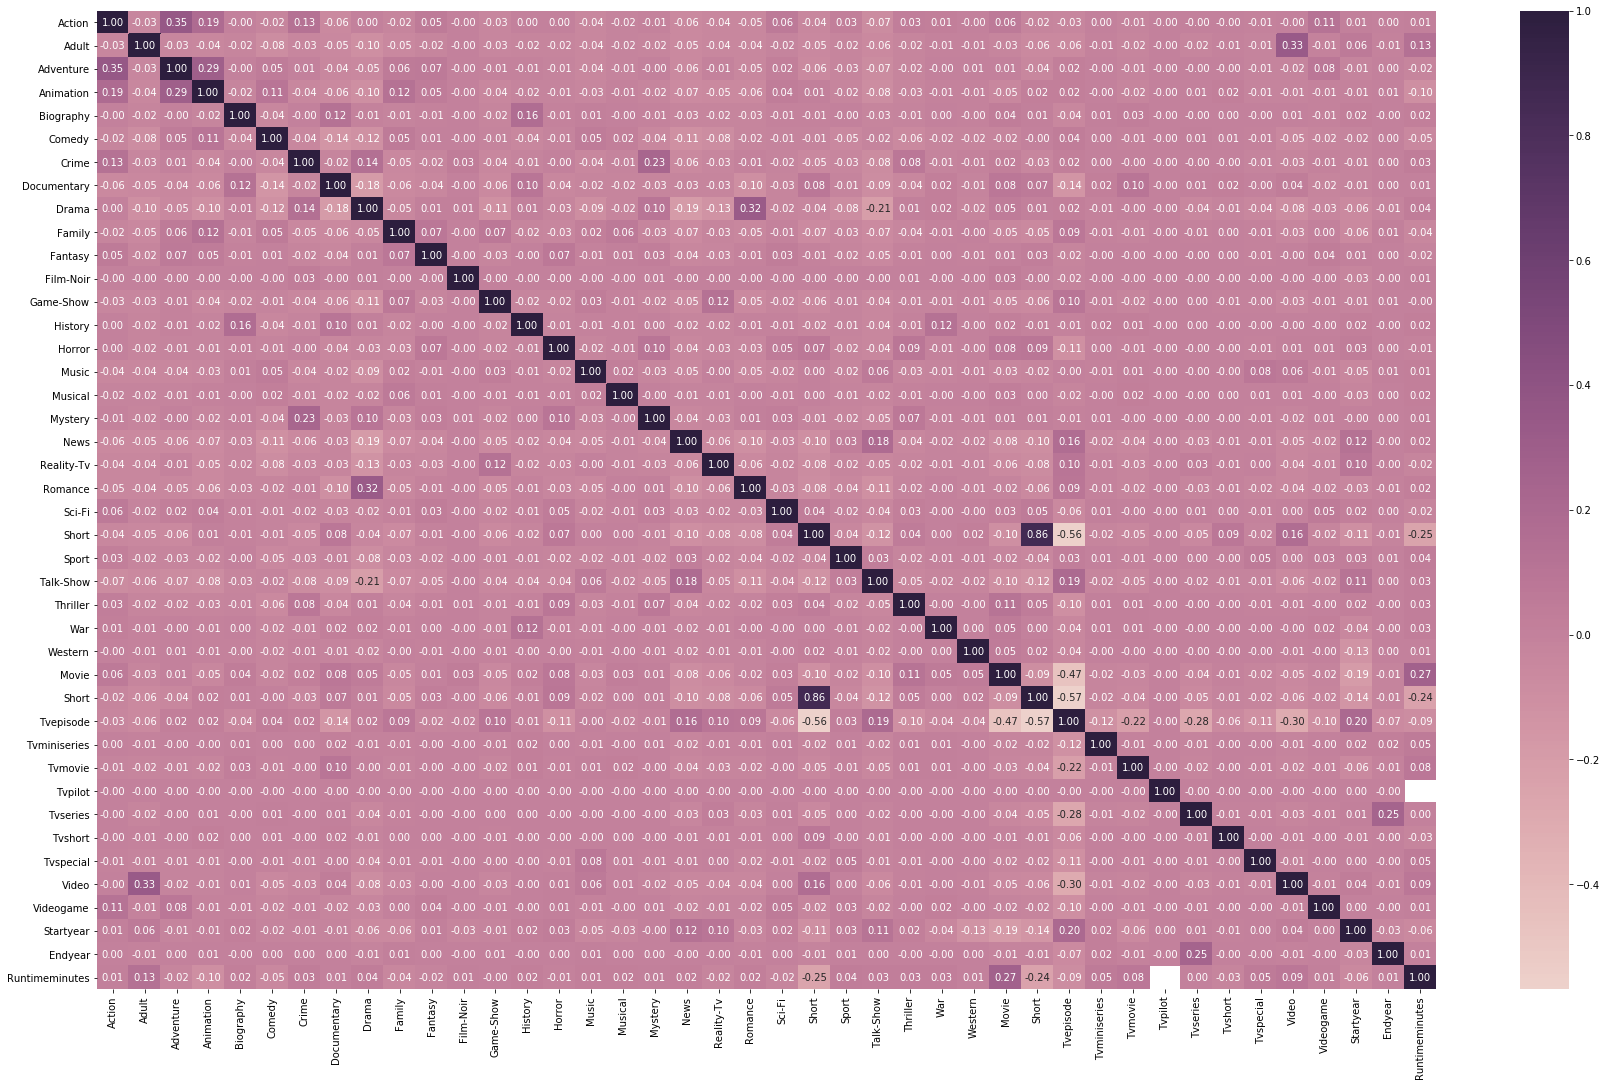

In [22]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(30,18))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax, fmt='.2f')

In [23]:
def bit_sum_32(b):
    b = ((b & 0xAAAAAAAA) >>  1) + (b & 0x55555555)
    b = ((b & 0xCCCCCCCC) >>  2) + (b & 0x33333333)
    b = ((b & 0xF0F0F0F0) >>  4) + (b & 0x0F0F0F0F)
    b = ((b & 0xFF00FF00) >>  8) + (b & 0x00FF00FF)
    b = ((b & 0xFFFF0000) >> 16) + (b & 0x0000FFFF)
    return b & 1

def add_parity(data):
    return (data << 1) | bit_sum_32(data)

def H3126_encode(data):
        return ((data & 0x3ffffff) << 5) \
             | (bit_sum_32(data & 0x3fff80) << 4) \
             | (bit_sum_32(data & 0x1c7f878) << 3) \
             | (bit_sum_32(data & 0x2d9e666) << 2) \
             | (bit_sum_32(data & 0x36ad555) << 1) \
             | bit_sum_32(data & 0x3b4b4cb)
    
def H3226_encode(data):
    return add_parity(H3126_encode(data))

In [24]:
def handleItemsList(s):
    arr = [0.] * 30
    if isinstance(s, str):
        vals = s.split(",")
        if vals:
            weight = 0.7 / len(vals)
            for v in vals:
                n = int(parse("nm{}", v)[0]) #H3226_encode(int(parse("nm{}", v)[0]))
                for i in range(30):
                    arr[i] += weight if (n & (1 << i)) else 0.
    return tuple(arr)    

def makeItemsDummies(col, df, prefix):
    temp = list(zip(*col.map(handleItemsList)))
    # return pd.DataFrame.from_records(temp)
    for i in range(30):
        df[prefix + str(i)] = temp[i] 

In [25]:
!curl -O https://datasets.imdbws.com/title.crew.tsv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  4 55.3M    4 2467k    0     0  2597k      0  0:00:21 --:--:--  0:00:21 2594k
  9 55.3M    9 5530k    0     0  2835k      0  0:00:19  0:00:01  0:00:18 2834k
 15 55.3M   15 8556k    0     0  2900k      0  0:00:19  0:00:02  0:00:17 2899k
 20 55.3M   20 11.3M    0     0  2935k      0  0:00:19  0:00:03  0:00:16 2935k
 25 55.3M   25 14.0M    0     0  2888k      0  0:00:19  0:00:04  0:00:15 2888k
 31 55.3M   31 17.2M    0     0  2968k      0  0:00:19  0:00:05  0:00:14 3039k
 36 55.3M   36 20.2M    0     0  2981k      0  0:00:18  0:00:06  0:00:12 3038k
 42 55.3M   42 23.2M    0     0  2992k      0  0:00:18  0:00:07  0:00:11 3047k
 47 55.3M   47 26.1M    0     0  2993k      0  0:00:18  0:00:08  0:00:10 3040k
 52 55.3M   52 29.0M    0     0  2990k      0  0:00

In [26]:
crew = pd.read_csv("title.crew.tsv.gz",compression='gzip', sep='\t', dtype={"directors": str,"writers": str}, na_values = '\\N')

In [27]:
makeItemsDummies(crew["directors"], crew, "d")

In [28]:
makeItemsDummies(crew["writers"], crew, "w")

In [29]:
basics["directors"] = crew["directors"]
basics["writers"] = crew["writers"]
del crew["directors"]
del crew["writers"]

In [30]:
crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8489813 entries, 0 to 8489812
Data columns (total 61 columns):
 #   Column  Dtype  
---  ------  -----  
 0   tconst  object 
 1   d0      float64
 2   d1      float64
 3   d2      float64
 4   d3      float64
 5   d4      float64
 6   d5      float64
 7   d6      float64
 8   d7      float64
 9   d8      float64
 10  d9      float64
 11  d10     float64
 12  d11     float64
 13  d12     float64
 14  d13     float64
 15  d14     float64
 16  d15     float64
 17  d16     float64
 18  d17     float64
 19  d18     float64
 20  d19     float64
 21  d20     float64
 22  d21     float64
 23  d22     float64
 24  d23     float64
 25  d24     float64
 26  d25     float64
 27  d26     float64
 28  d27     float64
 29  d28     float64
 30  d29     float64
 31  w0      float64
 32  w1      float64
 33  w2      float64
 34  w3      float64
 35  w4      float64
 36  w5      float64
 37  w6      float64
 38  w7      float64
 39  w8      float64
 40  

In [31]:
df["tconst"] = basics["tconst"]

In [32]:
df = df.join(crew.set_index("tconst"), on="tconst")

In [33]:
!curl -O https://datasets.imdbws.com/title.ratings.tsv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 10 5809k   10  591k    0     0   770k      0  0:00:07 --:--:--  0:00:07  770k
 60 5809k   60 3519k    0     0  2179k      0  0:00:02  0:00:01  0:00:01 2178k
100 5809k  100 5809k    0     0  2475k      0  0:00:02  0:00:02 --:--:-- 2476k


In [34]:
ratings = pd.read_csv("title.ratings.tsv.gz",compression='gzip', sep='\t', na_values = '\\N')

In [35]:
ratings.numVotes = np.where(pd.isnull(ratings.numVotes), 0, np.log(ratings.numVotes + 1))

In [36]:
ratings = ratings.interpolate()

In [37]:
column_names_to_normalize = ['averageRating', 'numVotes']
x_scaled = min_max_scaler.fit_transform(ratings[column_names_to_normalize].values)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = ratings.index)
ratings[column_names_to_normalize] = df_temp

In [38]:
ratings.tail(10)

,tconst,averageRating,numVotes
1192574,tt9916544,0.677778,0.159066
1192575,tt9916576,0.544444,0.075795
1192576,tt9916578,0.733333,0.146604
1192577,tt9916580,0.744444,0.011912
1192578,tt9916628,0.844444,0.000000
1192579,tt9916682,0.511111,0.000000
1192580,tt9916690,0.622222,0.000000
1192581,tt9916720,0.477778,0.251279
1192582,tt9916766,0.633333,0.089075
1192583,tt9916778,0.700000,0.134045


In [39]:
df = df.join(ratings.set_index("tconst"), on="tconst")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8489813 entries, 0 to 8489812
Columns: 105 entries, Action to numVotes
dtypes: float64(65), int64(28), object(1), uint8(11)
memory usage: 6.0+ GB


In [41]:
list(df.columns.values)

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western',
 'movie',
 'short',
 'tvEpisode',
 'tvMiniSeries',
 'tvMovie',
 'tvPilot',
 'tvSeries',
 'tvShort',
 'tvSpecial',
 'video',
 'videoGame',
 'startYear',
 'endYear',
 'runtimeMinutes',
 'tconst',
 'd0',
 'd1',
 'd2',
 'd3',
 'd4',
 'd5',
 'd6',
 'd7',
 'd8',
 'd9',
 'd10',
 'd11',
 'd12',
 'd13',
 'd14',
 'd15',
 'd16',
 'd17',
 'd18',
 'd19',
 'd20',
 'd21',
 'd22',
 'd23',
 'd24',
 'd25',
 'd26',
 'd27',
 'd28',
 'd29',
 'w0',
 'w1',
 'w2',
 'w3',
 'w4',
 'w5',
 'w6',
 'w7',
 'w8',
 'w9',
 'w10',
 'w11',
 'w12',
 'w13',
 'w14',
 'w15',
 'w16',
 'w17',
 'w18',
 'w19',
 'w20',
 'w21',
 'w22',
 'w23',
 'w24',
 'w25',
 'w26',
 'w27',
 'w28',
 'w29',
 'averageRatin

In [42]:
del df['tconst']

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8489813 entries, 0 to 8489812
Columns: 104 entries, Action to numVotes
dtypes: float64(65), int64(28), uint8(11)
memory usage: 6.0 GB


In [44]:
df = df.interpolate()

In [45]:
n_components = 50
whiten = False
random_state = 2018

In [46]:
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [47]:
X_train_PCA = pca.fit_transform(df)

In [48]:
X_train_PCA = pd.DataFrame(data=X_train_PCA)

In [49]:
X_train_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8489813 entries, 0 to 8489812
Data columns (total 50 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       float64
 1   1       float64
 2   2       float64
 3   3       float64
 4   4       float64
 5   5       float64
 6   6       float64
 7   7       float64
 8   8       float64
 9   9       float64
 10  10      float64
 11  11      float64
 12  12      float64
 13  13      float64
 14  14      float64
 15  15      float64
 16  16      float64
 17  17      float64
 18  18      float64
 19  19      float64
 20  20      float64
 21  21      float64
 22  22      float64
 23  23      float64
 24  24      float64
 25  25      float64
 26  26      float64
 27  27      float64
 28  28      float64
 29  29      float64
 30  30      float64
 31  31      float64
 32  32      float64
 33  33      float64
 34  34      float64
 35  35      float64
 36  36      float64
 37  37      float64
 38  38      float64
 39  39      float64
 40  

In [50]:
print("Variance Explained by principal components: ", sum(pca.explained_variance_ratio_))

Variance Explained by principal components:  0.8719959249900578


In [51]:
# Percentage of Variance Captured by X principal components
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

print('Variance Captured by First 2 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values)
print('Variance Captured by First 5 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:4].sum(axis=1).values)
print('Variance Captured by First 10 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:9].sum(axis=1).values)
print('Variance Captured by First 20 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:19].sum(axis=1).values)
print('Variance Captured by First 30 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:29].sum(axis=1).values)

Variance Captured by First 2 Principal Components:  [0.2704723]
Variance Captured by First 5 Principal Components:  [0.37912859]
Variance Captured by First 10 Principal Components:  [0.46392822]
Variance Captured by First 20 Principal Components:  [0.59687787]
Variance Captured by First 30 Principal Components:  [0.7214295]


In [52]:
import pickle
with open('imdb_object_data.pickle', 'wb') as f:
    pickle.dump([basics, X_train_PCA], f)

In [53]:
kdtree = KDTree(X_train_PCA)

In [54]:
def findNearest(tconst):
    idx = basics[basics["tconst"] == tconst].index[0]
    _, ind = kdtree.query(X_train_PCA[idx:idx+1], k=51)
    return basics.iloc[ind[0][1:]]

In [55]:
findNearest("tt0120338")

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers
94625,tt0096754,movie,The Abyss,The Abyss,0.0,1989.0,0.0,140.0,"Adventure,Drama,Mystery",nm0000116,nm0000116
44457,tt0045251,movie,Othello,The Tragedy of Othello: The Moor of Venice,0.0,1951.0,0.0,90.0,"Drama,History,Romance",nm0000080,"nm0000636,nm0000080,nm0755068"
365937,tt0381681,movie,Before Sunset,Before Sunset,0.0,2004.0,0.0,80.0,"Drama,Romance",nm0000500,"nm0000500,nm0000365,nm0000160,nm0471811"
4959721,tt2209418,movie,Before Midnight,Before Midnight,0.0,2013.0,0.0,109.0,"Drama,Romance",nm0000500,"nm0000500,nm0000365,nm0000160,nm0471811"
335938,tt0350730,movie,"Comforters, Miserable","Comforters, Miserable",0.0,2001.0,0.0,72.0,Drama,nm0000628,nm0000628
41012,tt0041735,movie,The Passionate Friends,The Passionate Friends,0.0,1949.0,0.0,95.0,"Drama,Romance",nm0000180,"nm0920229,nm0001907,nm0000180,nm0371552"
36901,tt0037558,movie,Brief Encounter,Brief Encounter,0.0,1945.0,0.0,86.0,"Drama,Romance",nm0000180,"nm0002021,nm0369743,nm0000180,nm0623768"
4135597,tt15739482,video,Titanic: Deleted Scenes,Titanic: Deleted Scenes,0.0,2012.0,0.0,56.0,"Drama,Romance,Short",nm0000116,nm0000116
28251,tt0028756,movie,Woman of Malacca,La dame de Malacca,0.0,1937.0,0.0,113.0,"Drama,Romance",nm0002165,"nm0188544,nm0700020,nm0527331"
6538516,tt5637536,movie,Avatar 5,Avatar 5,0.0,2028.0,0.0,NaN,"Action,Adventure,Drama",nm0000116,nm0000116


In [58]:
idx = basics[basics["tconst"] == "tt0120338"].index[0]
_, ind = kdtree.query(X_train_PCA[idx:idx+1], k=100)
nearest3d =  X_train_PCA.iloc[ind[0]]

tsne = TSNE(n_components=3).fit_transform(nearest3d)

texts = basics.iloc[ind[0]]["primaryTitle"]

li = []
for x in range(100):
    li.append(x)

scatter = go.Scatter3d(
    x=tsne[:,0],
    y=tsne[:,1],
    z=tsne[:,2],
    mode='markers',
    text=texts,
    marker=dict(
        size=8,
        color=li,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    ))

fig = go.Figure(data=[scatter])

plot(fig, filename='simple-3d-scatter.html')

'simple-3d-scatter.html'